In [ ]:
# upload kaggle API token key
from google.colab import files
files.upload()

In [ ]:
# install the kaggle API client
!pip install -q kaggle

In [ ]:
# kaggle API client expects this file to bin ~/.kaggle folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
# give permmission change avoid a warning on kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# create a directory and change the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [ ]:
# search on kaggle to get a list of datasets
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          73596        906  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           9576        239  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            340          8  0.75             
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [ ]:
# download the dataset and coming out of the directory
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

100% 610M/612M [00:33<00:00, 20.7MB/s]
100% 612M/612M [00:33<00:00, 18.9MB/s]
/content


In [ ]:
# unzip dataset
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [ ]:
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

In [ ]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

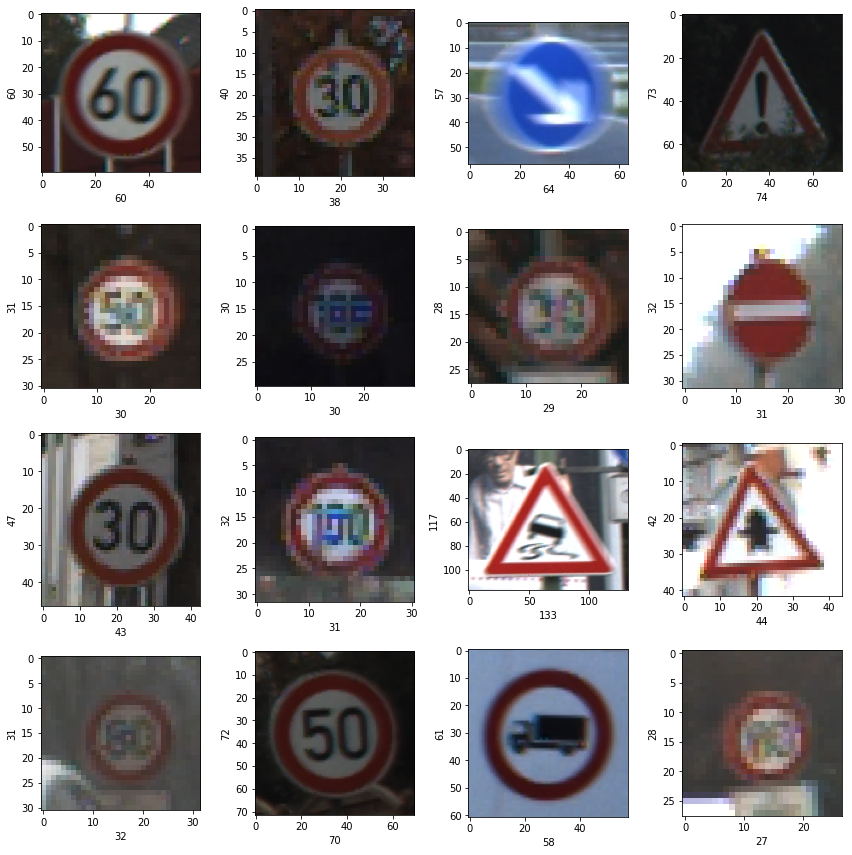

In [ ]:
# plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = 'traffic_sign_dataset/Test'
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path+'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize= 10) # width of image
  plt.ylabel(rand_img.shape[0], fontsize= 10) # height of image

In [ ]:
# resize images as they have different sizes
dim1 = []
dim2 = []

for i in range(0,43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = imread(labels + '/' + x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

In [ ]:
# print mean dimensions of images
print('Dimension 1 Mean:', np.mean(dim1), 'Dimension 2 Mean: ', np.mean(dim2))

Dimension 1 Mean: 50.328929582493814 Dimension 2 Mean:  50.83587951745773


In [ ]:
images = []
label_id = []

for i in range(43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)

In [ ]:
# convert images into numpy array and normalize them
images = np.array(images)
# note that pixel value ranges between 0 and 255
# divide each image by 255 will scale the values bewteen 0 and 1 (normalization)
images = images / 255

In [ ]:
# print shape of label_id
label_id = np.array(label_id)
label_id.shape

(39209,)

In [ ]:
# print shape of images
images.shape

(39209, 50, 50, 3)

In [ ]:
# check if the dataset is balanced or not
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [ ]:
# split data to train and test sets
X_train, X_val, y_train, y_val = train_test_split(images, label_id, test_size=0.2, random_state = 42)

In [ ]:
# coverting y to categorical data using one-hot-enconding
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [ ]:
# building the model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape=X_train.shape[1:], activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# sparse_categorical_crossentropy because there are many classes to choose from

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [ ]:
# fitting the model
model.fit(X_train, y_train, epochs = 50, batch_size=128, validation_data=(X_val, y_val), verbose=2)

Epoch 1/50
246/246 - 12s - loss: 2.5090 - accuracy: 0.3090 - val_loss: 1.2988 - val_accuracy: 0.6517 - 12s/epoch - 49ms/step
Epoch 2/50
246/246 - 4s - loss: 1.2601 - accuracy: 0.6065 - val_loss: 0.6368 - val_accuracy: 0.8758 - 4s/epoch - 17ms/step
Epoch 3/50
246/246 - 4s - loss: 0.8632 - accuracy: 0.7247 - val_loss: 0.3541 - val_accuracy: 0.9259 - 4s/epoch - 17ms/step
Epoch 4/50
246/246 - 4s - loss: 0.6787 - accuracy: 0.7818 - val_loss: 0.2613 - val_accuracy: 0.9573 - 4s/epoch - 16ms/step
Epoch 5/50
246/246 - 4s - loss: 0.5704 - accuracy: 0.8155 - val_loss: 0.1789 - val_accuracy: 0.9638 - 4s/epoch - 17ms/step
Epoch 6/50
246/246 - 4s - loss: 0.4926 - accuracy: 0.8379 - val_loss: 0.1428 - val_accuracy: 0.9688 - 4s/epoch - 17ms/step
Epoch 7/50
246/246 - 4s - loss: 0.4477 - accuracy: 0.8546 - val_loss: 0.1286 - val_accuracy: 0.9779 - 4s/epoch - 17ms/step
Epoch 8/50
246/246 - 4s - loss: 0.4113 - accuracy: 0.8660 - val_loss: 0.1053 - val_accuracy: 0.9792 - 4s/epoch - 17ms/step
Epoch 9/50
246

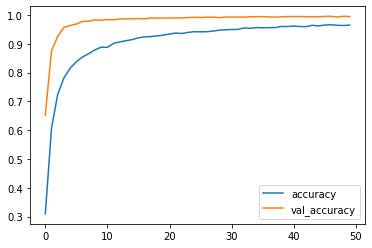

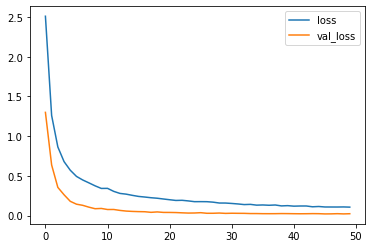

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [ ]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [ ]:
# define a funtion to scale images
from PIL import Image

def scaling(test_images, test_path):
  images = []

  image_path = test_images

  for x in image_path:
    img = Image.open(test_path + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)

  # convert images to numpy array
  images = np.array(images)
  # scaling (normalization)
  images = images / 255

  return images

In [ ]:
test_images = scaling(sorted(os.listdir(test_path)), test_path)

In [ ]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
# predict_classes is deprecated -> use np.argmax instead
y_pred = np.argmax(model.predict(test_images), axis=-1)
y_pred

395/395 [==============================] - 1s 3ms/step


array([16,  1, 38, ..., 38,  7, 10])

In [ ]:
all_labels = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

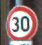

In [ ]:
# visualize test image
img = Image.open(test_path + '/00001.png')
img

In [ ]:
# print oringinal label
print("Original label:", all_labels[y_test[1]])

Original label: Speed limit (30km/h)


In [ ]:
# print predicted label
print("Predicted Label:", all_labels[y_pred[1]])

Predicted Label: Speed limit (30km/h)
